In [1]:
2+2

4

In [2]:
prices_a = [8.7, 8.91, 8.71]

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
prices = np.array(prices_a)

In [9]:
prices[1:] / prices[:-1] - 1

array([ 0.02413793, -0.02244669])

In [10]:
prices = pd.DataFrame({"BLUE": [8.7, 8.91, 8.71, 8.43, 8.73],
                      "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]})

In [11]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [16]:
prices.iloc[1:].values / prices.iloc[:-1]

,BLUE,ORANGE
0,1.024138,1.039400
1,0.977553,0.966606
2,0.967853,1.082166
3,1.035587,1.044866


In [17]:
prices.iloc[1:] / prices.iloc[:-1].values

,BLUE,ORANGE
1,1.024138,1.039400
2,0.977553,0.966606
3,0.967853,1.082166
4,1.035587,1.044866


In [19]:
prices / prices.shift(1)

,BLUE,ORANGE
0,NaN,NaN
1,1.024138,1.039400
2,0.977553,0.966606
3,0.967853,1.082166
4,1.035587,1.044866


In [20]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [21]:
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [24]:
prices = pd.read_csv('data/sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [25]:
returns = prices.pct_change()

<AxesSubplot:>

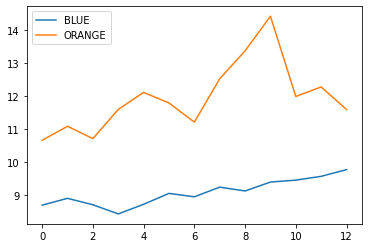

In [26]:
prices.plot()

<AxesSubplot:>

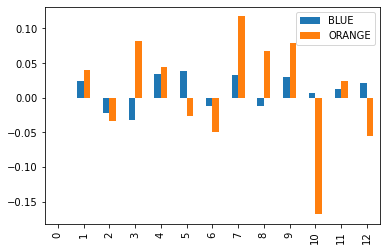

In [27]:
returns.plot.bar()

<AxesSubplot:>

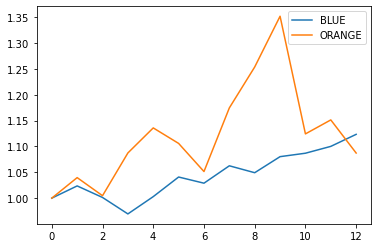

In [29]:
(prices / prices.iloc[0, :]).plot()

<AxesSubplot:>

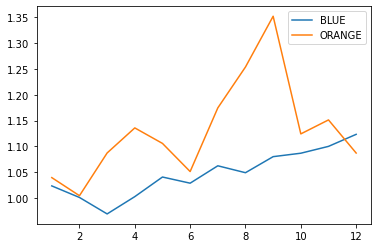

In [30]:
(returns + 1).cumprod().plot()

In [35]:
np.exp(np.log(1+returns).mean())

BLUE      1.009737
ORANGE    1.006989
dtype: float64

<AxesSubplot:>

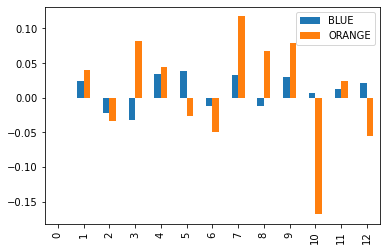

In [40]:
returns.plot.bar()

In [41]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [42]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [44]:
np.exp(np.log(1+returns).std())-1

BLUE      0.024161
ORANGE    0.085150
dtype: float64

In [45]:
np.prod(returns+1)

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [46]:
(returns+1).prod()

BLUE      1.123310
ORANGE    1.087167
dtype: float64

## Annualization

In [48]:
rm = 0.01
(1+rm)**12

1.1268250301319698

In [49]:
rd = 0.0001
(1+rd)**252

1.0255189119876946

In [50]:
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [71]:
np.sqrt(((returns - returns.mean())**2).sum()/(returns.dropna().index.size-1))

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [78]:
(returns - returns.mean())

,BLUE,ORANGE
0,NaN,NaN
1,0.013621,0.029662
2,-0.031807,-0.043638
3,-0.041763,0.072232
4,0.024477,0.034544
5,0.027786,-0.036381
6,-0.021452,-0.059187
7,0.022677,0.107008
8,-0.022581,0.057353
9,0.019581,0.068250


In [81]:
np.sqrt(((returns - returns.mean()).applymap(lambda x: min(x, 0))**2).sum()/(returns.dropna().index.size-1))

BLUE      0.018441
ORANGE    0.062387
dtype: float64

In [82]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [83]:
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [104]:
returns = returns.dropna().reset_index(drop=True)
returns = pd.concat([returns, pd.DataFrame({'RF': [0.01] * 12})], axis='columns')

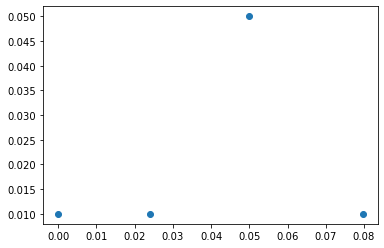

In [147]:
plt.scatter(np.concatenate([returns.std().to_numpy(), [.05]]), 
            np.concatenate([np.array([0.00999991, 0.00999986, 0.01      ]), [.05]]))

In [137]:
np.concatenate([returns.std().to_numpy(), np.array([.1])])

array([2.39774178e-02, 7.96012680e-02, 1.81185958e-18, 1.00000000e-01])

In [127]:
returns.mean().to_numpy()

array([0.00999991, 0.00999986, 0.01      ])